#Import Library

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Memuat dataset

In [38]:
url = "drive/MyDrive/dataset/insurance.csv"
asuransi = pd.read_csv(url)
asuransi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Data Understanding

In [39]:
asuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Melihat Statistik dari dataset

In [40]:
asuransi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Melihat apakah ada missing value

In [41]:
asuransi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Exploratory data analysis (EDA)

###Visualisasi fitur numerik untuk menangani outlier

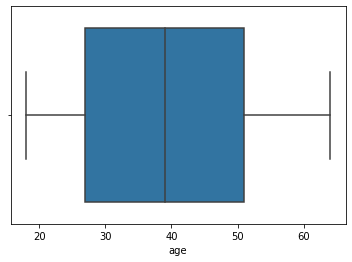

In [42]:
sns.boxplot(x=asuransi['age'])

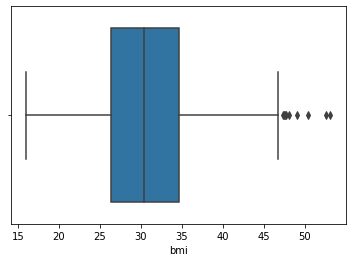

In [43]:
sns.boxplot(x=asuransi['bmi'])

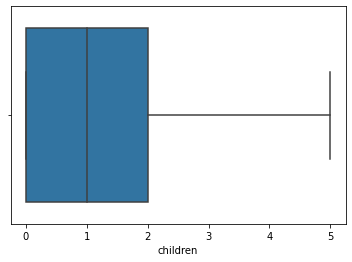

In [44]:
sns.boxplot(x=asuransi['children'])

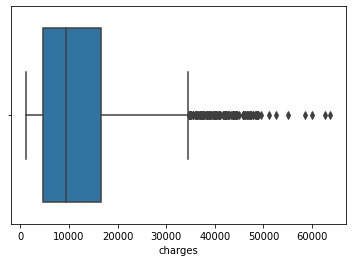

In [45]:
sns.boxplot(x=asuransi['charges'])

###Drop outliers 

dengan rumus:

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR

In [46]:
Q1 = asuransi.quantile(0.25)
Q3 = asuransi.quantile(0.75)
IQR=Q3-Q1
asuransi=asuransi[~((asuransi<(Q1-1.5*IQR))|(asuransi>(Q3+1.5*IQR))).any(axis=1)]

asuransi.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(1193, 7)

##Univariate EDA

In [47]:
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

###Fitur Kategorikal

####Fitur sex

        jumlah sampel  persentase
female            611        51.2
male              582        48.8


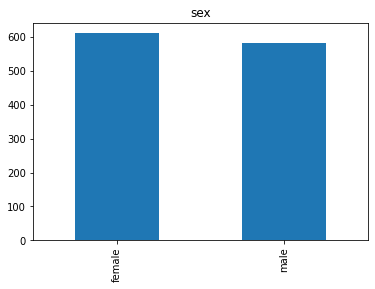

In [48]:
feature = categorical_features[0]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

####Fitur smoker

     jumlah sampel  persentase
no            1055        88.4
yes            138        11.6


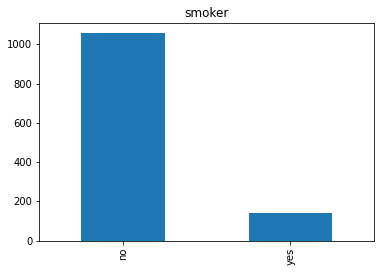

In [49]:
feature = categorical_features[1]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

####Fitur region

           jumlah sampel  persentase
northwest            305        25.6
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


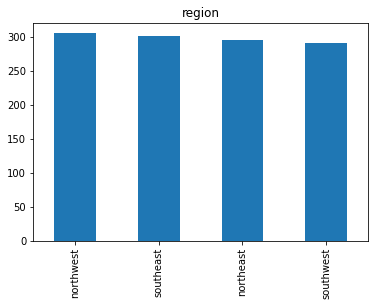

In [50]:
feature = categorical_features[2]
count = asuransi[feature].value_counts()
percent = 100*asuransi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

###Fitur Numerik

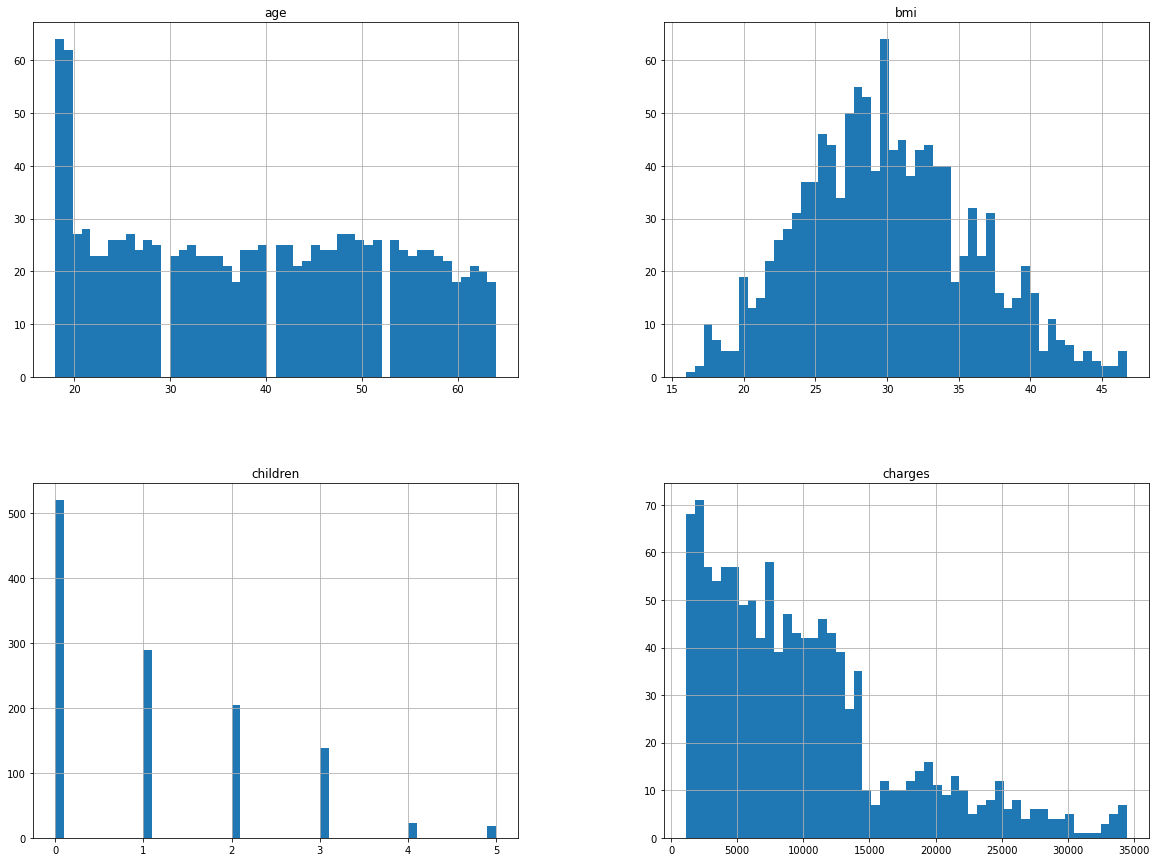

In [51]:
asuransi.hist(bins=50, figsize=(20,15))
plt.show()

##Multivariate EDA

###Fitur kategorikal

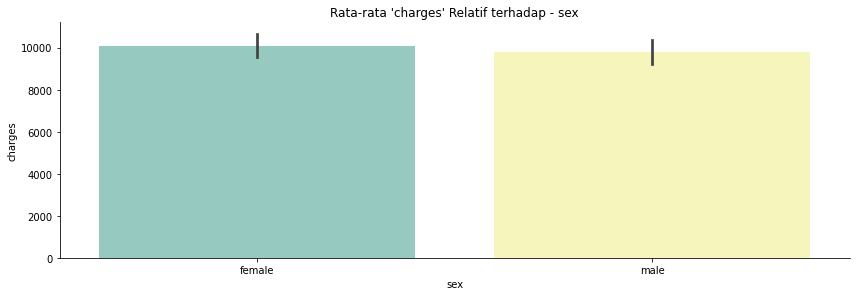

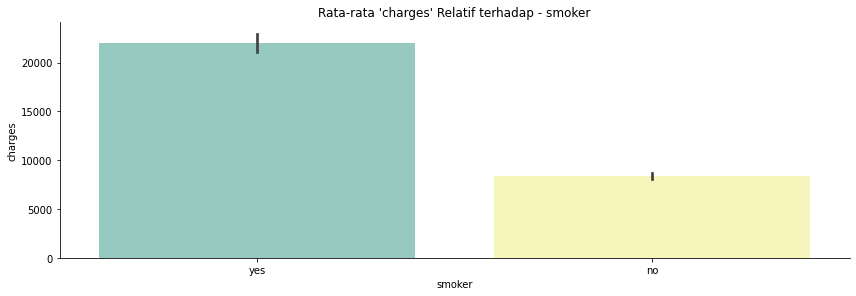

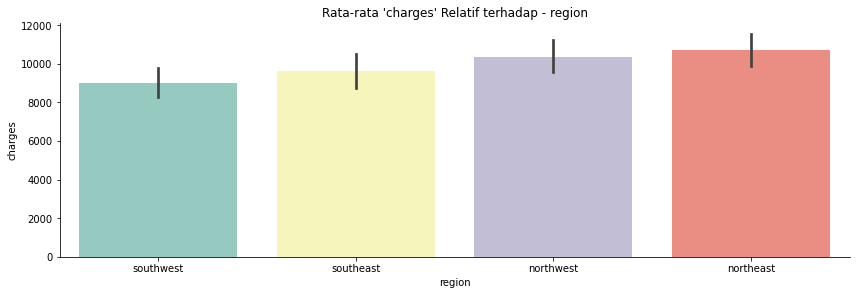

In [52]:
cat_features = asuransi.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=asuransi, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

###Fitur Numerik

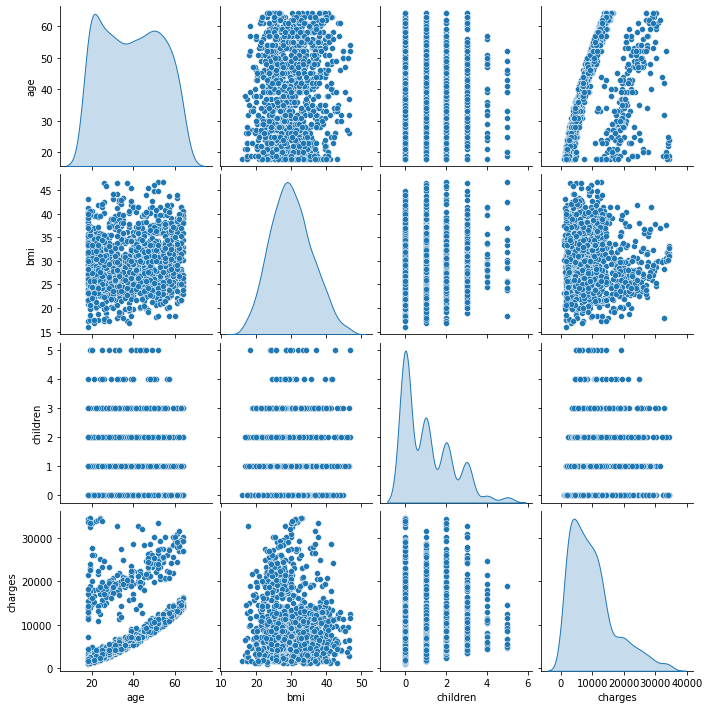

In [53]:
sns.pairplot(asuransi, diag_kind = 'kde')

###Melihat matriks korelasi untuk fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

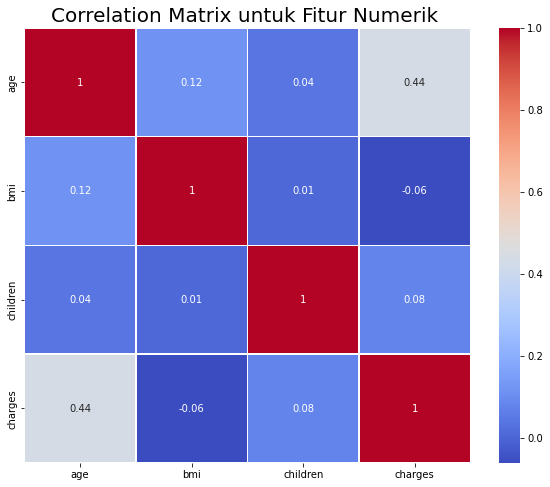

In [54]:
plt.figure(figsize=(10,8))
correlation_matrix = asuransi.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

###Drop fitur 'bmi' karena memiliki korelasi paling kecil

In [55]:
asuransi.drop(['bmi'], inplace=True, axis=1)
asuransi.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


#Data Preparation

##One-hot-encoding


In [56]:
from sklearn.preprocessing import  OneHotEncoder

asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['sex'], prefix='sex')],axis=1)
asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['smoker'], prefix='smoker')],axis=1)
asuransi = pd.concat([asuransi, pd.get_dummies(asuransi['region'], prefix='region')],axis=1)
asuransi.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
asuransi.head()

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,1,0,0,0,1
1,18,1,1725.55230,0,1,1,0,0,0,1,0
2,28,3,4449.46200,0,1,1,0,0,0,1,0
3,33,0,21984.47061,0,1,1,0,0,1,0,0
4,32,0,3866.85520,0,1,1,0,0,1,0,0


##Membagi data latih (train) dan data uji (test)

In [57]:
from sklearn.model_selection import train_test_split
 
X = asuransi.drop(["charges"],axis =1)
y = asuransi["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [58]:
print(f'Total keseluruhan data: {len(X)}')
print(f'Total data latih (train): {len(X_train)}')
print(f'Total data uji (test): {len(X_test)}')

Total keseluruhan data: 1193
Total data latih (train): 954
Total data uji (test): 239


##Standarisasi

In [59]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['age', 'children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,children
824,1.483294,-0.890958
194,-1.475908,-0.890958
1060,-1.053165,-0.890958
820,0.426436,-0.073675
996,0.003693,1.560891


In [60]:
X_train[numerical_features].describe().round(4)

,age,children
count,954.0000,954.0000
mean,-0.0000,0.0000
std,1.0005,1.0005
min,-1.4759,-0.8910
25%,-0.9123,-0.8910
50%,0.0037,-0.0737
75%,0.8492,0.7436
max,1.7651,3.1955


#Model Development

In [61]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

##KNN

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##RandomForest

In [63]:
from sklearn.ensemble import RandomForestRegressor
 
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

##Boosting Algorithm

In [64]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#Evaluasi Model

##Scaling fitur numerik

In [65]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

##Evaluasi ketiga model

In [66]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,21157.354742,25649.820001
RF,7943.760964,22299.436057
Boosting,22190.573887,20945.939389


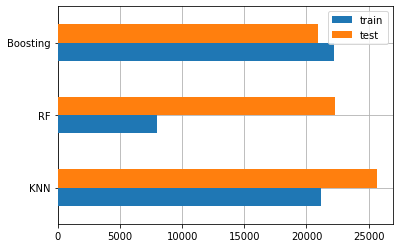

In [67]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

##Menguji ketiga model

In [69]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(5)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
274,2523.16950,5988.68799,2755.62838,5639.72206
1040,20234.85475,17497.45236,22604.62558,21099.29075
483,9880.06800,13064.72173,10360.07335,12568.12090


Kesimpulannya algoritma Random Forest (RF) memberikan hasil yang paling mendekati dibanding algoritma lainnya.